## Importing Libraries

In [2]:
import numpy as np
import pandas as pd 
import re # for regex
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score
import pickle

## Reading the data

In [4]:
data = pd.read_csv('IMDB-Dataset.csv')
print(data.shape)
data.head()

(50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [6]:
data.isnull().sum()  # Checking the null Values

review       0
sentiment    0
dtype: int64

In [8]:
data.sentiment.value_counts()  # Checking the value counts of sentiments

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [9]:
#Label encode sentiment to 1(positive) and 0(negative)
data.sentiment.replace('positive',1,inplace=True)
data.sentiment.replace('negative',0,inplace=True)
data.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
5,"Probably my all-time favorite movie, a story o...",1
6,I sure would like to see a resurrection of a u...,1
7,"This show was an amazing, fresh & innovative i...",0
8,Encouraged by the positive comments about this...,0
9,If you like original gut wrenching laughter yo...,1


## Data Cleaning

### Remove HTML Tags

In [10]:
def clean(text):
    cleaned = re.compile(r'<.*?>')
    return re.sub(cleaned,'',text)

data.review = data.review.apply(clean)
data.review[0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.I would say the main appeal of the show is due to the fact that it goes where other shows wo

### Remove Special Characters

In [11]:
def is_special(text):
    rem = ''
    for i in text:
        if i.isalnum():
            rem = rem + i
        else:
            rem = rem + ' '
    return rem

data.review = data.review.apply(is_special)
data.review[0]

'One of the other reviewers has mentioned that after watching just 1 Oz episode you ll be hooked  They are right  as this is exactly what happened with me The first thing that struck me about Oz was its brutality and unflinching scenes of violence  which set in right from the word GO  Trust me  this is not a show for the faint hearted or timid  This show pulls no punches with regards to drugs  sex or violence  Its is hardcore  in the classic use of the word It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary  It focuses mainly on Emerald City  an experimental section of the prison where all the cells have glass fronts and face inwards  so privacy is not high on the agenda  Em City is home to many  Aryans  Muslims  gangstas  Latinos  Christians  Italians  Irish and more    so scuffles  death stares  dodgy dealings and shady agreements are never far away I would say the main appeal of the show is due to the fact that it goes where other shows wo

### Everything in Lowercase

In [12]:
def to_lower(text):
    return text.lower()

data.review = data.review.apply(to_lower)
data.review[0]

'one of the other reviewers has mentioned that after watching just 1 oz episode you ll be hooked  they are right  as this is exactly what happened with me the first thing that struck me about oz was its brutality and unflinching scenes of violence  which set in right from the word go  trust me  this is not a show for the faint hearted or timid  this show pulls no punches with regards to drugs  sex or violence  its is hardcore  in the classic use of the word it is called oz as that is the nickname given to the oswald maximum security state penitentary  it focuses mainly on emerald city  an experimental section of the prison where all the cells have glass fronts and face inwards  so privacy is not high on the agenda  em city is home to many  aryans  muslims  gangstas  latinos  christians  italians  irish and more    so scuffles  death stares  dodgy dealings and shady agreements are never far away i would say the main appeal of the show is due to the fact that it goes where other shows wo

### Removing Stopwords
such as “the”, “a”, “an”, “in”

In [15]:
import nltk
nltk.download('stopwords') # Downloading Stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Anmol\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [17]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Anmol\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [18]:
def rem_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    return [w for w in words if w not in stop_words]

data.review = data.review.apply(rem_stopwords)
data.review[0]

['one',
 'reviewers',
 'mentioned',
 'watching',
 '1',
 'oz',
 'episode',
 'hooked',
 'right',
 'exactly',
 'happened',
 'first',
 'thing',
 'struck',
 'oz',
 'brutality',
 'unflinching',
 'scenes',
 'violence',
 'set',
 'right',
 'word',
 'go',
 'trust',
 'show',
 'faint',
 'hearted',
 'timid',
 'show',
 'pulls',
 'punches',
 'regards',
 'drugs',
 'sex',
 'violence',
 'hardcore',
 'classic',
 'use',
 'word',
 'called',
 'oz',
 'nickname',
 'given',
 'oswald',
 'maximum',
 'security',
 'state',
 'penitentary',
 'focuses',
 'mainly',
 'emerald',
 'city',
 'experimental',
 'section',
 'prison',
 'cells',
 'glass',
 'fronts',
 'face',
 'inwards',
 'privacy',
 'high',
 'agenda',
 'em',
 'city',
 'home',
 'many',
 'aryans',
 'muslims',
 'gangstas',
 'latinos',
 'christians',
 'italians',
 'irish',
 'scuffles',
 'death',
 'stares',
 'dodgy',
 'dealings',
 'shady',
 'agreements',
 'never',
 'far',
 'away',
 'would',
 'say',
 'main',
 'appeal',
 'show',
 'due',
 'fact',
 'goes',
 'shows',
 'da

### Stem the words
 A stemming algorithm reduces the words “chocolates”, “chocolatey”, “choco” to the root word, “chocolate” and “retrieval”, “retrieved”, “retrieves” reduce to the stem “retrieve”.

In [19]:
def stem_txt(text):
    ss = SnowballStemmer('english')
    return " ".join([ss.stem(w) for w in text])

data.review = data.review.apply(stem_txt)
data.review[0]

'one review mention watch 1 oz episod hook right exact happen first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use word call oz nicknam given oswald maximum secur state penitentari focus main emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home mani aryan muslim gangsta latino christian italian irish scuffl death stare dodgi deal shadi agreement never far away would say main appeal show due fact goe show dare forget pretti pictur paint mainstream audienc forget charm forget romanc oz mess around first episod ever saw struck nasti surreal say readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard sold nickel inmat kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may becom comfort uncomfort view that get touch darker side'

In [20]:
data.head()

,review,sentiment
0,one review mention watch 1 oz episod hook righ...,1
1,wonder littl product film techniqu unassum old...,1
2,thought wonder way spend time hot summer weeke...,1
3,basic famili littl boy jake think zombi closet...,0
4,petter mattei love time money visual stun film...,1


### Building the Model

In [21]:
X = np.array(data.iloc[:,0].values)
y = np.array(data.sentiment.values)
cv = CountVectorizer(max_features = 1000)
X = cv.fit_transform(data.review).toarray()
print("X.shape = ",X.shape)
print("y.shape = ",y.shape)

X.shape =  (50000, 1000)
y.shape =  (50000,)


In [22]:
# Train Test Split
trainx,testx,trainy,testy = train_test_split(X,y,test_size=0.2,random_state=9)
print("Train shapes : X = {}, y = {}".format(trainx.shape,trainy.shape))
print("Test shapes : X = {}, y = {}".format(testx.shape,testy.shape))

Train shapes : X = (40000, 1000), y = (40000,)
Test shapes : X = (10000, 1000), y = (10000,)


In [23]:
# Models
gnb,mnb,bnb = GaussianNB(),MultinomialNB(alpha=1.0,fit_prior=True),BernoulliNB(alpha=1.0,fit_prior=True)
gnb.fit(trainx,trainy)
mnb.fit(trainx,trainy)
bnb.fit(trainx,trainy)

BernoulliNB()

In [24]:
ypg = gnb.predict(testx)
ypm = mnb.predict(testx)
ypb = bnb.predict(testx)

In [34]:
#Accuracy Score 

In [25]:
print("Gaussian = ",accuracy_score(testy,ypg))
print("Multinomial = ",accuracy_score(testy,ypm))
print("Bernoulli = ",accuracy_score(testy,ypb))

Gaussian =  0.7843
Multinomial =  0.831
Bernoulli =  0.8386


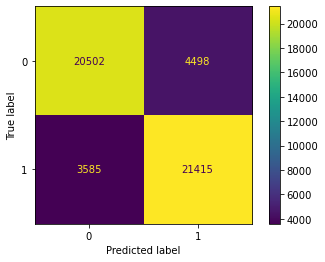

In [37]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(bnb,X,y)

## Prediction

### Testing On Comment

In [26]:
pickle.dump(bnb,open('model1.pkl','wb'))

In [27]:
rev =  """Terrible. Complete trash. Brainless tripe. Insulting to anyone who isn't an 8 year old fan boy. Im actually pretty disgusted that this movie is making the money it is - what does it say about the people who brainlessly hand over the hard earned cash to be 'entertained' in this fashion and then come here to leave a positive 8.8 review?? Oh yes, they are morons. Its the only sensible conclusion to draw. How anyone can rate this movie amongst the pantheon of great titles is beyond me.

So trying to find something constructive to say about this title is hard...I enjoyed Iron Man? Tony Stark is an inspirational character in his own movies but here he is a pale shadow of that...About the only 'hook' this movie had into me was wondering when and if Iron Man would knock Captain America out...Oh how I wished he had :( What were these other characters anyways? Useless, bickering idiots who really couldn't organise happy times in a brewery. The film was a chaotic mish mash of action elements and failed 'set pieces'...

I found the villain to be quite amusing.

And now I give up. This movie is not robbing any more of my time but I felt I ought to contribute to restoring the obvious fake rating and reviews this movie has been getting on IMDb."""

In [28]:
# Applying the previouly defined functions
f1 = clean(rev)
f2 = is_special(f1)
f3 = to_lower(f2)
f4 = rem_stopwords(f3)
f5 = stem_txt(f4)

In [29]:
bow,words = [],word_tokenize(f5)
for word in words:
    bow.append(words.count(word))
#np.array(bow).reshape(1,3000)
#bow.shape
word_dict = cv.vocabulary_
pickle.dump(word_dict,open('bow.pkl','wb'))

In [30]:
inp = []
for i in word_dict:
    inp.append(f5.count(i[0]))
y_pred = bnb.predict(np.array(inp).reshape(1,1000))

In [31]:
y_pred

array([0], dtype=int64)

0 Means Negative Comment.